In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Задача 1

In [3]:
data = pd.read_csv('covid_line.csv', sep = ',')

In [5]:
data.head()

,#,"Country,\r\nOther",Total\r\nCases,Total\r\nDeaths,New\r\nDeaths,Total\r\nRecovered,Active\r\nCases,"Serious,\r\nCritical",Tot Cases/\r\n1M pop,Deaths/\r\n1M pop,Total\r\nTests,Tests/\r\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [6]:
data.rename(columns={'Country,\r\nOther': 'Country_Other', 
                     'Total\r\nCases' : 'Total_Cases', 
                     'Total\r\nDeaths':'Total_Deaths', 
                     'New\r\nDeaths':'New_Deaths', 
                     'Total\r\nRecovered':'Total_Recovered', 
                     'Active\r\nCases':'Active_Cases', 
                     'Serious,\r\nCritical':'Serious_Critical',
                     'Tot Cases/\r\n1M pop':'Tot_Cases_1M_pop', 
                     'Deaths/\r\n1M pop':'Deaths_1M_pop', 
                     'Total\r\nTests':'Total_Tests', 
                     'Tests/\r\n1M pop':'Tests_1M_pop'}, 
            inplace=True)

In [7]:
data

,#,Country_Other,Total_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_1M_pop,Deaths_1M_pop,Total_Tests,Tests_1M_pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,NaN,NaN,80,0,NaN,"49,322",NaN,NaN,NaN,"1,622"
226,227,Vatican City,29,NaN,NaN,29,0,NaN,"36,295",NaN,NaN,NaN,799
227,228,Tuvalu,20,NaN,NaN,NaN,20,NaN,"1,658",NaN,NaN,NaN,"12,066"
228,229,Western Sahara,10,1,NaN,9,0,NaN,16,2,NaN,NaN,"626,161"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #                 230 non-null    int64  
 1   Country_Other     230 non-null    object 
 2   Total_Cases       230 non-null    object 
 3   Total_Deaths      225 non-null    object 
 4   New_Deaths        3 non-null      float64
 5   Total_Recovered   214 non-null    object 
 6   Active_Cases      215 non-null    object 
 7   Serious_Critical  147 non-null    object 
 8   Tot_Cases_1M_pop  228 non-null    object 
 9   Deaths_1M_pop     223 non-null    object 
 10  Total_Tests       214 non-null    object 
 11  Tests_1M_pop      214 non-null    object 
 12  Population        228 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 23.5+ KB


In [10]:
data.describe()

,#,New_Deaths
count,230.000000,3.0
mean,115.500000,18.0
std,66.539462,21.0
min,1.000000,3.0
25%,58.250000,6.0
50%,115.500000,9.0
75%,172.750000,25.5
max,230.000000,42.0


In [ ]:
# Задача 2

In [ ]:
# В колонке New_Deaths только 3 non-null, поэтому ее можно дропнуть

In [11]:
data.drop('New_Deaths', axis = 1, inplace = True) 

In [12]:
data.head()

,#,Country_Other,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_1M_pop,Deaths_1M_pop,Total_Tests,Tests_1M_pop,Population
0,1,USA,"98,166,904","1,084,282","94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629","44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078","34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027","33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948","32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [13]:
data.dropna(inplace=True)

In [16]:
data.isna().any()

#                   False
Country_Other       False
Total_Cases         False
Total_Deaths        False
Total_Recovered     False
Active_Cases        False
Serious_Critical    False
Tot_Cases_1M_pop    False
Deaths_1M_pop       False
Total_Tests         False
Tests_1M_pop        False
Population          False
dtype: bool

In [14]:
data.dtypes

#                    int64
Country_Other       object
Total_Cases         object
Total_Deaths        object
Total_Recovered     object
Active_Cases        object
Serious_Critical    object
Tot_Cases_1M_pop    object
Deaths_1M_pop       object
Total_Tests         object
Tests_1M_pop        object
Population          object
dtype: object

In [15]:
len(data) # сколько строк осталось

137

In [ ]:
# Задача 3

In [18]:
def convert_to_numeric(value):
    cleaned_value = re.sub(",", "", value)
    numeric_value = float(cleaned_value)
    return numeric_value

In [17]:
data.columns

Index(['#', 'Country_Other', 'Total_Cases', 'Total_Deaths', 'Total_Recovered',
       'Active_Cases', 'Serious_Critical', 'Tot_Cases_1M_pop', 'Deaths_1M_pop',
       'Total_Tests', 'Tests_1M_pop', 'Population'],
      dtype='object')

In [19]:
data["Total_Cases"] = data["Total_Cases"].apply(convert_to_numeric)
data["Total_Deaths"] = data["Total_Deaths"].apply(convert_to_numeric)
data["Total_Recovered"] = data["Total_Recovered"].apply(convert_to_numeric)
data["Active_Cases"] = data["Active_Cases"].apply(convert_to_numeric)
data["Serious_Critical"] = data["Serious_Critical"].apply(convert_to_numeric)
data["Tot_Cases_1M_pop"] = data["Tot_Cases_1M_pop"].apply(convert_to_numeric)
data["Deaths_1M_pop"] = data["Deaths_1M_pop"].apply(convert_to_numeric)
data["Total_Tests"] = data["Total_Tests"].apply(convert_to_numeric)
data["Tests_1M_pop"] = data["Tests_1M_pop"].apply(convert_to_numeric)
data["Population"] = data["Population"].apply(convert_to_numeric)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 218
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #                 137 non-null    int64  
 1   Country_Other     137 non-null    object 
 2   Total_Cases       137 non-null    float64
 3   Total_Deaths      137 non-null    float64
 4   Total_Recovered   137 non-null    float64
 5   Active_Cases      137 non-null    float64
 6   Serious_Critical  137 non-null    float64
 7   Tot_Cases_1M_pop  137 non-null    float64
 8   Deaths_1M_pop     137 non-null    float64
 9   Total_Tests       137 non-null    float64
 10  Tests_1M_pop      137 non-null    float64
 11  Population        137 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
# Задача 4

In [23]:
data["Total_Deaths"].sum() # Всего умерло

6311376.0

In [25]:
data["Total_Recovered"].sum() #Всего выздоровело

574608492.0

In [ ]:
# Задача 5.
# Добавим новую колонку к нашей таблице: 'death_to_recovered', 
# а в ней посчитаем соотношение смертей к выздоровевшим. 
# Страна с наименьшим таким значением - удачливее всех :)
# Попробуем отсортировать табличку по этим значениям 
# (используйте метод DataFrame.sort_values(column)).


In [26]:
data['Death_to_recovered'] = data['Total_Deaths'] / data['Total_Recovered']

In [27]:
data.head()

,#,Country_Other,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_1M_pop,Deaths_1M_pop,Total_Tests,Tests_1M_pop,Population,Death_to_recovered
0,1,USA,98166904.0,1084282.0,94962112.0,2120510.0,2970.0,293206.0,3239.0,1.118159e+09,3339729.0,3.348053e+08,0.011418
1,2,India,44587307.0,528629.0,44019095.0,39583.0,698.0,31698.0,376.0,8.944169e+08,635857.0,1.406632e+09,0.012009
2,3,France,35342950.0,155078.0,34527115.0,660757.0,869.0,538892.0,2365.0,2.714902e+08,4139547.0,6.558452e+07,0.004491
3,4,Brazil,34706757.0,686027.0,33838636.0,182094.0,8318.0,161162.0,3186.0,6.377617e+07,296146.0,2.153536e+08,0.020273
4,5,Germany,33312373.0,149948.0,32315200.0,847225.0,1406.0,397126.0,1788.0,1.223324e+08,1458359.0,8.388360e+07,0.004640


In [28]:
data.sort_values('Death_to_recovered')

,#,Country_Other,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_1M_pop,Deaths_1M_pop,Total_Tests,Tests_1M_pop,Population,Death_to_recovered
218,219,Saint Pierre Miquelon,3188.0,1.0,2449.0,738.0,1.0,553568.0,174.0,24902.0,4324015.0,5759.0,0.000408
45,46,Singapore,1904192.0,1617.0,1821160.0,81415.0,9.0,320380.0,272.0,24345019.0,4096043.0,5943546.0,0.000888
110,111,Brunei,226237.0,225.0,222140.0,3872.0,3.0,507906.0,505.0,717784.0,1611437.0,445431.0,0.001013
213,214,Palau,5460.0,6.0,5444.0,10.0,1.0,299457.0,329.0,64681.0,3547469.0,18233.0,0.001102
5,6,S. Korea,24769101.0,28406.0,24013461.0,727234.0,352.0,482547.0,553.0,15804065.0,307892.0,51329899.0,0.001183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,18,Mexico,7084488.0,330065.0,6353953.0,400470.0,4798.0,53849.0,2509.0,18393211.0,139806.0,131562772.0,0.051946
33,34,Peru,4143085.0,216539.0,3914598.0,11948.0,147.0,122998.0,6429.0,35126382.0,1042815.0,33684208.0,0.055316
88,89,Egypt,515645.0,24613.0,442182.0,48850.0,122.0,4857.0,232.0,3693367.0,34792.0,106156692.0,0.055663
200,201,Micronesia,9759.0,29.0,157.0,9573.0,1.0,83063.0,247.0,21923.0,186596.0,117489.0,0.184713


In [ ]:
# Задача 6.
# Откроем новый датасет: в нем собрана информация про мобильные телефоны, 
# их характеристики и ценовой диапазон. Посмотрите, какие там есть колонки, 
# прикиньте, что они могут означать. Проверьте, есть ли в этом датасете пропущенные значения.

In [29]:
df = pd.read_csv('mobile.csv', sep = ',')

In [31]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [34]:
df.isna().any() # Если False, значит, пропущенных значений нет

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [35]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [38]:
set(df.blue)


{0, 1}

In [39]:
set(df.clock_speed)

{0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0}

In [40]:
set(df.fc)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [42]:
set(df.pc)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}

In [41]:
set(df.four_g)

{0, 1}

In [43]:
set(df.sc_h)

{5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [44]:
set(df.sc_w)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

'battery_power', ---- емкость аккумулятора (мА ч)
'blue', ------------- поддержка bluetooth (да/нет)
'clock_speed', ------ тактовая частота процессора от 0,5 до 3,0 с шагом 0,1
'dual_sim', --------- 2 сим-карты (да/нет)
'fc', --------------- фронтальная камера от 0 до 19 (мегапикселей)
'four_g',------------ поддержка 4G (да/нет)
'int_memory', ------- внутренняя память (Гб)
'm_dep', ------------ глубина 
'mobile_wt', -------- вес
'n_cores', ---------- кол-во ядер
'pc', --------------- основная камера от 0 до 20 (мегапикселей)
'px_height', -------- разрешение (высота) экрана (пиксели)
'px_width', --------- разрешение (ширина) экрана (пиксели)
'ram', -------------- оперативная память (Мб)
'sc_h', ------------- высота экрана от 5 до 19
'sc_w', ------------- ширина экрана от 0 до 18 (или нет, потому что от 0)
'talk_time', -------- время работы в режиме разговора (ч)
'three_g',----------- поддержка 3G (да/нет)
'touch_screen', ----- сенсорный экран (да/нет)
'wifi', ------------- поддержка wi-fi (да/нет)
'price_range' ------- диапазон цены от 0 до 3 (бюджетный, ниже среднего, выше среднего, премиальный)

In [ ]:
# Задача 7.
# Сгруппируйте таблицу по колонке "диапазон цены", 
# посчитайте средние значения остальных колонок: 
# удостоверимся, что параметры действительно зависят от цены.

In [45]:
df.groupby('price_range').mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


Чем больше числовое обозначение цены, тем лучше характеристики 
(хотя телефоны с ценовым рангом "2" не всегда подчиняются этому правилу)

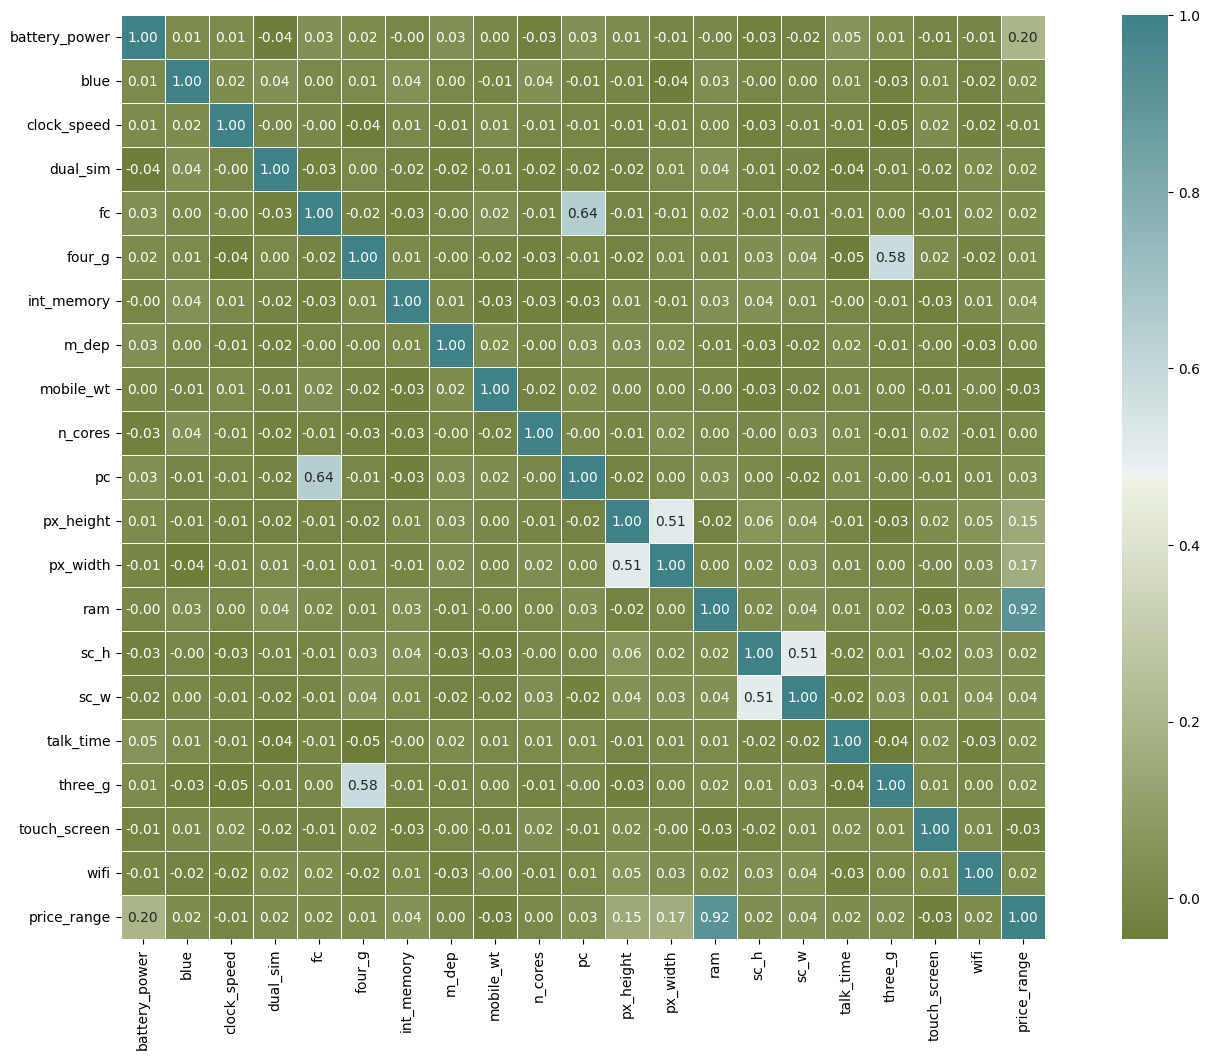

In [46]:
plt.figure(figsize=(20, 12))

corr = df.corr()
sns.heatmap(corr, 
            annot=True, linewidths=.5, fmt='.2f',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(100, 200, as_cmap=True), square=True)
plt.show()

Мы видим, что между собой сильно коррелируют пары признаков:

'sh_w' и 'sc_h' (0.51) - телефоны пропорциональны в размере (см);
'px_height' и 'px_width' (0.51) - телефоны пропорциональны в размере (пиксели);
'three_g' и 'foug_g'; (0.58) - если поддерживается 4G, то и 3G тоже (да/нет);
'pc' и 'fc'(0.64) - если основная камера четкая, то фронтальная тоже (мегапиксели);
'ram' и 'price_range'(0.92) - у самых дорогих телефонов самый большой объем оперативной памяти.

Также, похоже, на цену влияет емкость аккумулятора (0.20) и разрешение (0.15 px_height и 0.17 px_width).

Те признаки, которые попарно коррелируют между собой, можно дропнуть, по крайней мере 'sc_h', 'px_width', 'foug_g' и 'fc' (но 'ram' и 'price_range' мы не трогаем, так как нам интересно, от чего зависит цена).